In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [32]:
# Check for null values using isnull() or isna()
null_values = df.isnull().sum()
print(null_values)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [33]:
#convert categorical colomns to integers
label_encoded = df.copy()
label_encoded['experience_level'] = label_encoded['experience_level'].astype('category').cat.codes
label_encoded['employment_type'] = label_encoded['employment_type'].astype('category').cat.codes
label_encoded['job_title'] = label_encoded['job_title'].astype('category').cat.codes
label_encoded['salary_currency'] = label_encoded['salary_currency'].astype('category').cat.codes
label_encoded['employee_residence'] = label_encoded['employee_residence'].astype('category').cat.codes
label_encoded['company_location'] = label_encoded['company_location'].astype('category').cat.codes
label_encoded['company_size'] = label_encoded['company_size'].astype('category').cat.codes
label_encoded


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,2
3753,2020,0,0,17,100000,19,100000,75,100,70,0


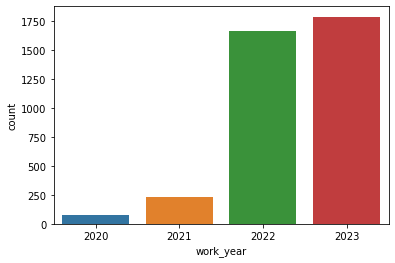

In [37]:

# Example using Seaborn countplot
sns.countplot(x='work_year', data=label_encoded)
plt.show()

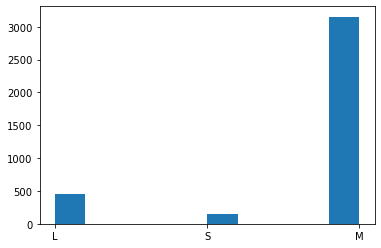

In [47]:
#example of histogram using matplot
plt.hist(df['company_size'])
plt.show()

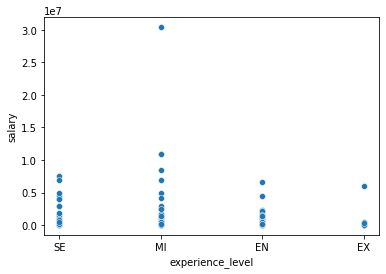

In [50]:
# Example using Seaborn scatterplot
sns.scatterplot(x='experience_level', y='salary', data=df)
plt.show()

In [84]:
"""
Create a list of 1000 random integers between 1 and 100000, then calculate the Z-Score
to check for the outliers. Consider values Z-Score > 2 as outliers 
"""
import random
import statistics

# Generate a list of 1000 random integers between 1 and 100000
random_list = [random.randint(1, 100000) for _ in range(1000)]

# Calculate the mean and standard deviation
mean = statistics.mean(random_list)
std_dev = statistics.stdev(random_list)

# Calculate the Z-Score for each value
z_scores = [(x - mean) / std_dev for x in random_list]

# Identify outliers with Z-Score > 2
outliers = [x for x, z in zip(random_list, z_scores) if z > 2]

print("Number of outliers:", len(outliers))
print("Outliers:", outliers)

Number of outliers: 0
Outliers: []


In [85]:
"""
Create a list of 10 random integers between 1 and 100.
- Standardize the numbers
- Normalize the numbers 
"""
import random
import statistics

# Generate a list of 10 random integers between 1 and 100
random_list = [random.randint(1, 100) for _ in range(10)]

# Standardize the numbers
mean = statistics.mean(random_list)
std_dev = statistics.stdev(random_list)
standardized_list = [(x - mean) / std_dev for x in random_list]

# Normalize the numbers
min_value = min(standardized_list)
max_value = max(standardized_list)
normalized_list = [(x - min_value) / (max_value - min_value) for x in standardized_list]

print("Original List:", random_list)
print("Standardized List:", standardized_list)
print("Normalized List:", normalized_list)


Original List: [90, 80, 63, 50, 87, 89, 24, 62, 86, 60]
Standardized List: [0.9760129231223924, 0.5090210938772287, -0.2848650158395496, -0.8919543938582625, 0.8359153743488433, 0.929313740197876, -2.106133149895688, -0.33156419876406595, 0.789216191424327, -0.4249625646130987]
Normalized List: [1.0, 0.8484848484848486, 0.5909090909090909, 0.3939393939393939, 0.9545454545454547, 0.9848484848484849, 0.0, 0.5757575757575758, 0.9393939393939396, 0.5454545454545455]


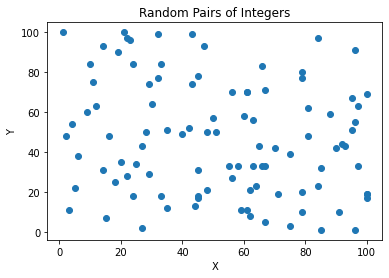

In [92]:
import random

# Generate a list of 100 random pairs of integers (x, y)
random_pairs = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(100)]

# Separate x and y coordinates into separate lists
x_values = [pair[0] for pair in random_pairs]
y_values = [pair[1] for pair in random_pairs]

# Create scatter plot
plt.scatter(x_values, y_values)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Pairs of Integers')
plt.show()
